# Natural Language Processing. Lesson 3. POS tagging and Parsing.


In this lesson, we are going to dive into the deeper layers of text using two fundamental techniques: Part-of-Speech (POS) tagging and Named Entity Recognition (NER).

The picture explains the whole process:

![Preprocessing](https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab03/preprocessing.jpg)

## POS tagging

One of the core tasks in NNLP is Parts-of-Speech (PoS) tagging, which is giving each word in a text a grammatical category, such as nouns, verbs, adjectives, and adverbs. Through improved comprehension of phrase structure and semantics, this technique makes it possible for machines to study and comprehend human language more accurately. There are corresponding abbreviations to each category: nouns - **NN**, verbs - **VB**, adjectives - **JJ**, adverbs - **RB**, pronouns - **PRP**, prepositions - **IN**, conjunctions - **CC**, **DT** - determiner.

![Preprocessing](https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab03/POS-Tagging-800x400.jpg)

For labels assignment we will use special models (tagsets, averaged_perceptron_tagger, conll2000) and download them with nltk.


In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
%%capture
import nltk
from nltk import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

# to identify and classify named entities within text, such as people, locations, organizations, dates, etc.
nltk.download("maxent_ne_chunker", quiet=True)

# to download the NLTK corpus of words, which is a large collection of English words
nltk.download("words", quiet=True)

# sentence tokenizer model for splitting text
nltk.download("punkt", quiet=True)

# to assign POS tags
nltk.download("averaged_perceptron_tagger", quiet=True)

# tagset definitions (NN, VB, etc)
nltk.download("tagsets", quiet=True)

# collection of text data annotated with POS tags and potentially NER information
nltk.download("conll2000", quiet=True)

In [3]:
# split the text into word tokens and assign labels
sentence = word_tokenize("allow us to add lines in list of allow actions")
nltk.pos_tag(sentence)

[('allow', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('add', 'VB'),
 ('lines', 'NNS'),
 ('in', 'IN'),
 ('list', 'NN'),
 ('of', 'IN'),
 ('allow', 'JJ'),
 ('actions', 'NNS')]

#### Task 1.
Fill the gaps. Do not forget to apply lowercase to the text.

In [4]:
text = 'The documentary explored the fascinating world of deep-sea creatures'

# split the text and assign POS tags
sentence = word_tokenize(text.lower())
words_with_tags = nltk.pos_tag(sentence)

print(words_with_tags)

[('the', 'DT'), ('documentary', 'NN'), ('explored', 'VBD'), ('the', 'DT'), ('fascinating', 'JJ'), ('world', 'NN'), ('of', 'IN'), ('deep-sea', 'NN'), ('creatures', 'NNS')]


In [5]:
assert len(words_with_tags[0]) == 2
assert len(words_with_tags) == 9
assert words_with_tags[1][1] == 'NN'

## Shallow Parsing or Chunking

A process of extracting phrases from _unstructured_ text. Chunking groups adjacent tokens into phrases on the basis of their POS tags, extracts meaningful phrases or chunks from text. There are some standard well-known chunks such as noun phrases, verb phrases, and prepositional phrases.

There are 5 major categories of phrases :

- Noun phrase (NP) - noun+determiner+adjective: "The quick brown fox" (determiner + adjective + noun), "A delicious cake" (determiner + adjective + noun)
- Adjective phrase (ADJP) - 1 or more adjectives: "Very interesting" (modifies the adjective "interesting"), "Incredibly beautiful flowers" (modifies the noun "flowers")
- Verb phrase (VP) - verb + modal verbs/adverbs/nouns: "Jumps over the fence" (verb + prepositional phrase), "Will sing a song" (helping verb + verb + direct object)
- Prepositional phrase (PP) - preposition+object: "On the table" (preposition + noun phrase), "With great enthusiasm" (preposition + adverb phrase)
- Adverb phrase (ADVP) - adverbs + additional modifiers: "Very quickly" (modifies the adverb "quickly"), "Ran across the street" (modifies the verb "ran")

Chunks consist of tokens and their tags:

![Chunking](https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab03/chunk.png)

In [6]:
# import the dataset for dividing text into syntactically related non-overlapping groups of words
from nltk.corpus import conll2000

data = conll2000.chunked_sents()
print(data[1])

(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)


The method conll2000.chunked_sents() retrieves all sentences from the corpus (large collection of text data) where each word is represented as a tuple containing the word itself and its POS tag, along with the sentence being further divided into phrase chunks. These chunks are represented as nested structures (trees) indicating the groupings of words based on their grammatical roles.

The sentence was: Chancellor of the Exchequer Nigel Lawson's restated commitment to a firm monetary policy has helped to prevent a freefall in sterling over the past week.

(S ... ) indicates the entire sentence itself. POS tags (word/tag): Chancellor/NNP where NNP - proper noun, commitment/NN where NN - noun. Chunking: the sentence is further divided into nested structures (chunks) based on the grammatical relationship of the words. (PP of/IN)represents a prepositional phrase (PP) with "of" as the preposition, (NP the/DT Exchequer/NNP) represents a noun phrase (NP) with "the" (determiner) and "Exchequer" (proper noun).

![Chunking](https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab03/shallow.png)

#### Task 2.

Fill the gaps. Tokenize the text, assign the tags, and apply the chunking.

Hint: use `nltk.RegexParser` module with grammar "NP: {< DT>? < JJ>* < NN>+}". You can find more grammars and rules (strip rule and split rule) [here](https://www.nltk.org/howto/chunk.html).

In [7]:
text = 'The documentary explored the fascinating world of deep-sea creatures'

# tokenize and assign tags
tokens = nltk.word_tokenize(text)
tagged = nltk.pos_tag(tokens)

# the grammar (pattern) that will be extracted as a chunk
grammar = r"NP: {<DT>? <JJ>* <NN>+}"

# create an instance of parser and use it
parser = nltk.RegexpParser(grammar)
chunks = parser.parse(tagged)

print(chunks)

(S
  (NP The/DT documentary/NN)
  explored/VBD
  (NP the/DT fascinating/JJ world/NN)
  of/IN
  (NP deep-sea/NN)
  creatures/NNS)


In [8]:
from nltk import Tree
assert chunks[2:3] == [Tree('NP', [('the', 'DT'), ('fascinating', 'JJ'), ('world', 'NN')])]

## 3. Constituency Parsing

Constituent-based grammars are used to analyze and determine the constituents of a sentence. These grammars can be used to model or represent the internal structure of sentences in terms of a _hierarchically_ ordered structure of their constituents. A constituency parser can be built based on such grammars/rules. **The grammar has to be defined.**

One of the popular Constituency Parsing implementation is from stanford. A **probabilistic context-free grammar parser**

Tag information can be found [here](https://web.archive.org/web/20130517134339/http://bulba.sdsu.edu/jeanette/thesis/PennTags.html)


In [9]:
!pip install benepar

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━

In [10]:
!python -m spacy download en_core_web_md
# In colab ⚠ Restart to reload dependencies

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 11.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [11]:
import benepar, spacy

nlp = spacy.load('en_core_web_md')
benepar.download('benepar_en3')
nlp.add_pipe('benepar', config={'model': 'benepar_en3'})
doc = nlp('The time for action is now. It is never too late to do something.')

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [12]:
sent = list(doc.sents)[0]

print(sent._.parse_string)
# (S (NP (NP (DT The) (NN time)) (PP (IN for) (NP (NN action)))) (VP (VBZ is) (ADVP (RB now))) (. .))

print(sent._.labels)
# ('S',)
print(list(sent._.children)[0])

(S (NP (NP (DT The) (NN time)) (PP (IN for) (NP (NN action)))) (VP (VBZ is) (ADVP (RB now))) (. .))
('S',)
The time for action


In [13]:
sentence = "The cat sat on the mat."
doc = nlp(sentence)
sent = list(doc.sents)[0]
print(sent._.parse_string)


(S (NP (DT The) (NN cat)) (VP (VBD sat) (PP (IN on) (NP (DT the) (NN mat)))) (. .))


#### Task 3.

Fill the gaps. Use the parser from the previous task (RegexpParser) and display the hierarchical structure.

In [29]:
!pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.6 MB/s eta 0:00:00


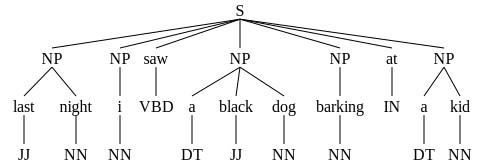

In [30]:
import nltk

# define the grammar (noun phrase)
grammar = ("NP: {<DT>?<JJ>*<NN>}")

sent = "last night i saw a black dog barking at a kid"

tokens = nltk.word_tokenize(sent)
tagged = nltk.pos_tag(tokens)

# parse the text
parser = nltk.RegexpParser(grammar)
tree = parser.parse(tagged)
tree

In [31]:
assert len(tree) == 7
assert tree[3:4] == [Tree('NP', [('a', 'DT'), ('black', 'JJ'), ('dog', 'NN')])]

## Dependency Parsing

In dependency parsing, we try to use dependency-based grammars to analyze and infer both structure and semantic dependencies and relationships between tokens in a sentence. It focuses on identifying the relationships between words within a sentence and how they depend on each other to convey meaning.

![](https://files.realpython.com/media/displacy_dependency_parse.de72f9b1d115.png)

Dependency Parsing is used in shallow parsing and named entity recognition.

What it Does:

- Dependency parsing breaks down a sentence into its constituent parts (words) and analyzes the grammatical relationships between them.
- It creates a dependency tree or dependency graph that visually represents these relationships.
- Unlike constituency parsing that focuses on phrases and clauses, dependency parsing concentrates on the relationships between individual words.


In [32]:
%%capture
!python -m spacy download en_core_web_sm

In [33]:
import spacy

# download the pipeline
text_processing_pipeline = spacy.load("en_core_web_sm")

# process the sentence
processed_sentence = text_processing_pipeline(
    "Innopolis University is a university located in the city of Innopolis."
)

In [34]:
from spacy import displacy

displacy.render(
    processed_sentence,
    jupyter=True,
    options={"distance": 110, "arrow_stroke": 2, "arrow_width": 8},
)

#### Task 4.
Fill the gaps. Lets try the French language. Load it using spacy.load() with the parameter 'fr_core_news_sm'.

In [35]:
%%capture
!python -m spacy download fr_core_news_sm

In [36]:
import spacy

# download the pipeline with a new language
pipeline = spacy.load("fr_core_news_sm")
sentence = "Le super chef test le menu fixe pour le web."

# process the sentence
processed_sentence = pipeline(sentence)
processed_sentence


Le super chef test le menu fixe pour le web.

In [37]:
from spacy import displacy

# display the dependency
displacy.render(
    processed_sentence,
    jupyter=True,
    options={"distance": 110, "arrow_stroke": 2, "arrow_width": 7},
)

In [38]:
assert len(processed_sentence[1]) == 5
assert (processed_sentence[1].pos_) == 'NOUN'

## 5. Named Entity Recognition

Named Entity Recognition (NER) is the process of locating named entities in unstructured text and then classifying them into pre-defined categories, such as person names, organizations, locations, monetary values, percentages, time expressions, and so on.

Application:
- Information extraction: NER helps extract structured information from unstructured text, making it easier to process and analyze large amounts of data
- Machine translation: NER improves the accuracy of machine translation by identifying and translating named entities correctly, preserving context and _meaning_

Common named entity types: person, location, time, date, product, money, percent, quantity, work_of_art, event, facility, gpe, ordinal, cardinal, etc.

In [39]:
sentence = "European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices"

#### NER with spacy


In [40]:
import en_core_web_sm

In [41]:
# download the pipeline
text_processing_pipeline = en_core_web_sm.load()

# parse the text
doc = text_processing_pipeline(sentence)

# check the results
print([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'), ('Google', 'ORG'), ('$5.1 billion', 'MONEY'), ('Wednesday', 'DATE')]


In [42]:
displacy.render(doc, style="ent", jupyter=True)

#### Task 5.

Fill the gaps. There are some predefined labels: person(per), nationalities, religious or political groups(norp), facility(fac), organization(org), location(loc), etc. Let's try to use NER to extract as much labels as possible.


In [43]:
import spacy
import en_core_web_sm

sentence = 'Yesterday, President Barack Obama, leader of the Democratic Party, visited the Eiffel Tower in Paris, \
France.  While there, he spoke about the importance of international cooperation on climate change and announced a \
new initiative with Chancellor Angela Merkel of Germany to invest $10 billion in renewable energy research by 2030. \
Reporters from all over the world were present, including journalists from the New York Times and BBC. The President \
then enjoyed a traditional French dinner at a quaint restaurant in Montmartre, a famous Parisian neighborhood known for \
its art scene.'

pipeline = en_core_web_sm.load()
doc = pipeline(sentence)
print([(X.text, X.label_) for X in doc.ents])


[('Yesterday', 'DATE'), ('Barack Obama', 'PERSON'), ('the Democratic Party', 'ORG'), ('the Eiffel Tower', 'FAC'), ('Paris', 'GPE'), ('France', 'GPE'), ('Angela Merkel', 'PERSON'), ('Germany', 'GPE'), ('$10 billion', 'MONEY'), ('2030', 'DATE'), ('the New York Times', 'ORG'), ('BBC', 'ORG'), ('French', 'NORP'), ('Montmartre', 'GPE'), ('Parisian', 'NORP')]


In [44]:
assert len(doc.ents) == 15

## Task

[Competition](https://www.kaggle.com/t/9e6b9b00b0094375a888823b8ecf78d7)

Your goal is to perform NER on recipe ingridients. For more details go to the competition


# Conclusion

Text analysis is a crucial aspect of Natural Language Processing (NLP), and various techniques exist to extract meaning from written language. This exploration has examined several key approaches: Part-of-Speech (POS) tagging, Named Entity Recognition (NER), shallow parsing (including constituency parsing), and dependency parsing.

- POS tagging lays the foundation by identifying the grammatical function of each word (e.g., noun, verb, adjective). NER goes a step further by recognizing and classifying named entities within the text, providing valuable insights into people, locations, organizations, and other relevant entities.

- Shallow parsing techniques, like constituency parsing, delve deeper into sentence structure by identifying phrases and clauses. This helps understand how words group together to form larger syntactic units. Dependency parsing, on the other hand, focuses on the direct relationships between individual words in a sentence, providing a more granular view of the grammatical structure.

- Choosing the appropriate technique depends on the specific NLP task. POS tagging and NER are foundational for many tasks, while shallow parsing and dependency parsing offer deeper syntactic analysis for tasks like machine translation, question answering, and sentiment analysis.

By understanding these techniques and their applications, we can unlock the power of text analysis and leverage its capabilities in various NLP applications.